In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,root_mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [28]:
df = pd.read_csv('apple_quality.csv')
df.head()


#class\t - accetable or unacceptable 

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [29]:
df.isnull().sum()

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [30]:
df=df.dropna()

In [31]:
df.isnull().sum()

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [32]:
le = LabelEncoder()
df['Quality'] = le.fit_transform(df['Quality'])


In [33]:
x = df[['Size', 'Weight','Juiciness', 'Ripeness', 'Crunchiness', 'Sweetness','Acidity']]
y = df['Quality']

x_train , x_test , y_train , y_test = train_test_split(x, y , test_size=0.2,random_state=42)

model = KNeighborsClassifier(n_neighbors=9)
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

print(" KNN accuracy score: ",accuracy_score(y_test,y_pred))
print("confusion matrix: \n",confusion_matrix(y_test,y_pred))
print("root mean square: \n",root_mean_squared_error(y_test,y_pred))

 KNN accuracy score:  0.90875
confusion matrix: 
 [[364  37]
 [ 36 363]]
root mean square: 
 0.3020761493398643


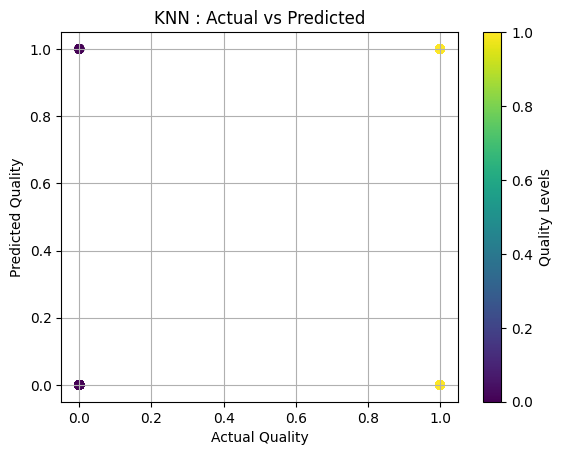

In [34]:
plt.scatter(y_test,y_pred,c=y_test,cmap='viridis')
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("KNN : Actual vs Predicted")
plt.colorbar(label="Quality Levels")
plt.grid()
plt.show()

In [35]:

model1 = LogisticRegression()
model1.fit(x_train,y_train)

y_pred1 = model1.predict(x_test)

print("accuracy score: ",accuracy_score(y_test,y_pred1))
print("confusion matrix: \n",confusion_matrix(y_test,y_pred1))
print("root mean square: \n",root_mean_squared_error(y_test,y_pred1))


accuracy score:  0.75375
confusion matrix: 
 [[303  98]
 [ 99 300]]
root mean square: 
 0.4962358310319802


In [36]:

model2 = RandomForestClassifier(n_estimators=100,random_state=42)
model2.fit(x_train,y_train)

y_pred2 = model2.predict(x_test)

print("accuracy score: ",accuracy_score(y_test,y_pred2))
print("confusion matrix:\n ",confusion_matrix(y_test,y_pred2))
print("root mean square: \n",root_mean_squared_error(y_test,y_pred2))

accuracy score:  0.90625
confusion matrix:
  [[360  41]
 [ 34 365]]
root mean square: 
 0.30618621784789724


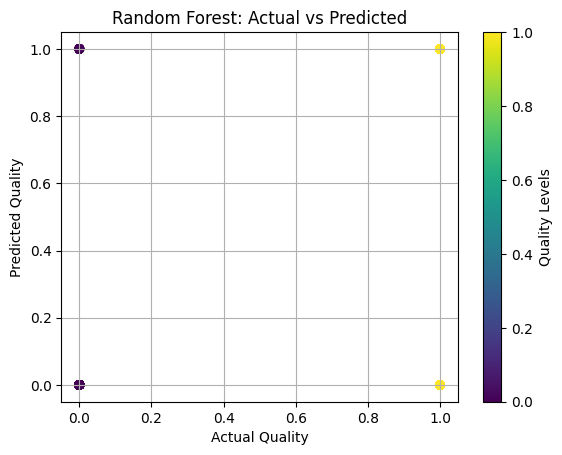

In [37]:
plt.scatter(y_test,y_pred2,c=y_test,cmap='viridis')
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Random Forest: Actual vs Predicted")
plt.colorbar(label="Quality Levels")
plt.grid()
plt.show()

In [38]:

model3 = DecisionTreeClassifier()
model3.fit(x_train,y_train)

y_pred3 = model3.predict(x_test)

print("accuracy score: ",accuracy_score(y_test,y_pred3))
print("confusion matrix:\n ",confusion_matrix(y_test,y_pred3))
print("root mean square: \n",root_mean_squared_error(y_test,y_pred3))


accuracy score:  0.8025
confusion matrix:
  [[321  80]
 [ 78 321]]
root mean square: 
 0.44440972086577946


In [39]:
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,1
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,1
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,0
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,1
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,1


In [40]:
#x = df[['Size', 'Weight','Juiciness', 'Ripeness', 'Crunchiness', 'Sweetness','Acidity']]
new = [[2.564585,-2.374758,3.8847565,0.548575,1.4857488,4.57335,1.9475738]]
new_data = model.predict(new)
print("Quality:",new_data)

Quality: [1]


d:\Machine Learning\machine\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
